__Update__: Solve equation $\sum_{d=1}^{\infty}\frac{d+1}{x~\cdot~e^d}=0.5$ so that the __repulsive__ effects won't make the probabilities negative.

09-06-2017

__Note that the inverse quadratic is not working since the sum would be $\infty$__

09-07-2017. Test again with `MyGrid` class. __Use constant $x=3.01$__ 

09-12-2017. Plot the trend for visualization

09-17-2017. Enhance visualization

<hr>

In [1]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import cityblock

In [2]:
from sympy import Symbol, oo, Sum, exp

In [3]:
from r_model import MyGrid

In [4]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

<hr>

#### Compute

In [7]:
d = Symbol('d')
x = Symbol('x')

Since $x$ should be a constant, convert the problem into: $x=\sum_{d=1}^{\infty}\frac{2d}{e^d}$

In [8]:
mySum = Sum(2*d/(exp(d)), (d, 1, oo))
mySum

Sum(2*d*exp(-d), (d, 1, oo))

In [9]:
mySum_value = mySum.doit()

In [10]:
mySum_value

2*exp(-1)/(-exp(-1) + 1)**2

In [11]:
x = mySum_value.evalf()
x

1.84134718841558

Therefore, use $x = 1.842$

#### Validation

In [12]:
def expProbability(d):
    return 1/(1.842*np.exp(d))

The maximum of the probability decrease is when all sensible cells have been taken:

In [13]:
sum([d*expProbability(d) for d in range(1, 100)])

0.49982279815841074

#### Test with `MyGrid`

In [91]:
grid = MyGrid(100, 100, False)

In [92]:
pos=(3,3)
dest = (100, 100)
current_dist = cityblock(pos, dest)
current_dist

194

In [93]:
cell_list = grid.my_get_neighborhood(pos, 20)
len(cell_list)

353

In [94]:
cell_list = [cell for cell in cell_list if cell[0] >= pos[0] and cityblock(cell, dest) < current_dist]

if pos[1] < dest[1]:
    cell_list = [cell for cell in cell_list if cell[1] >= pos[1]]
else:
    cell_list = [cell for cell in cell_list if cell[1] <= pos[1]]
print(cell_list)

[(4, 3), (5, 3), (6, 3), (7, 3), (8, 3), (9, 3), (10, 3), (11, 3), (12, 3), (13, 3), (14, 3), (15, 3), (16, 3), (17, 3), (18, 3), (19, 3), (20, 3), (21, 3), (22, 3), (23, 3), (3, 4), (4, 4), (5, 4), (6, 4), (7, 4), (8, 4), (9, 4), (10, 4), (11, 4), (12, 4), (13, 4), (14, 4), (15, 4), (16, 4), (17, 4), (18, 4), (19, 4), (20, 4), (21, 4), (22, 4), (3, 5), (4, 5), (5, 5), (6, 5), (7, 5), (8, 5), (9, 5), (10, 5), (11, 5), (12, 5), (13, 5), (14, 5), (15, 5), (16, 5), (17, 5), (18, 5), (19, 5), (20, 5), (21, 5), (3, 6), (4, 6), (5, 6), (6, 6), (7, 6), (8, 6), (9, 6), (10, 6), (11, 6), (12, 6), (13, 6), (14, 6), (15, 6), (16, 6), (17, 6), (18, 6), (19, 6), (20, 6), (3, 7), (4, 7), (5, 7), (6, 7), (7, 7), (8, 7), (9, 7), (10, 7), (11, 7), (12, 7), (13, 7), (14, 7), (15, 7), (16, 7), (17, 7), (18, 7), (19, 7), (3, 8), (4, 8), (5, 8), (6, 8), (7, 8), (8, 8), (9, 8), (10, 8), (11, 8), (12, 8), (13, 8), (14, 8), (15, 8), (16, 8), (17, 8), (18, 8), (3, 9), (4, 9), (5, 9), (6, 9), (7, 9), (8, 9), (9

In [96]:
distance_series = pd.Series([cityblock(cell, pos) for cell in cell_list])
distance_series.value_counts()

20    21
19    20
18    19
17    18
16    17
15    16
14    15
13    14
12    13
11    12
10    11
9     10
8      9
7      8
6      7
5      6
4      5
3      4
2      3
1      2
dtype: int64

In [108]:
sum([expProbability(cityblock(cell, pos)) for cell in cell_list])

0.49921936012925427

##### Should change the numerator to `d+1`

In [98]:
d = Symbol('d')
x = Symbol('x')

In [99]:
mySum = Sum(2*(d+1)/(exp(d)), (d, 1, oo))
mySum

Sum((2*d + 2)*exp(-d), (d, 1, oo))

In [100]:
mySum_value = mySum.doit()

In [101]:
mySum_value

2*exp(-1)/(-exp(-1) + 1) + 2*exp(-1)/(-exp(-1) + 1)**2

In [102]:
x = mySum_value.evalf()
x

3.00530060215424

#####  Validation

In [5]:
def expProbability(d):
    return 1/(3.01*np.exp(d))

In [6]:
sum([(d+1)*expProbability(d) for d in range(1, 200)])

0.49921936912861076

##### Plot

In [7]:
x = np.arange(1, 101, 1)

In [8]:
y1 = np.array([expProbability(d) for d in x])
y2 = np.array([sum([expProbability(k)*(k+1) for k in np.arange(1, d)]) for d in x])

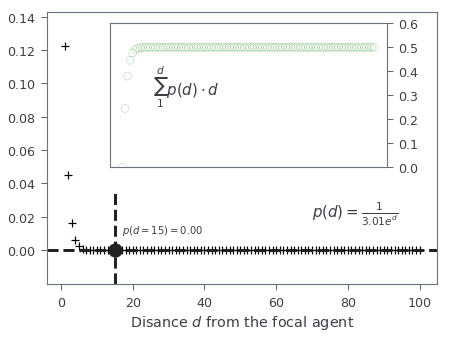

In [67]:
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)
ax.scatter(x, y1, c='black', marker='+', s=50)
axin = plt.axes([.25, .45, .55, .4])
axin.yaxis.set_ticks_position('right')
axin.scatter(x, y2, marker='o', s=60, facecolor='none', edgecolors='green')
axin.xaxis.set_ticks([])
axin.set_ylim((0, 0.55))
axin.set_yticks(ticks=[0, .1, .2, .3, .4, .5, .6])
axin.text(x=13, y=0.3, 
          s=r'$\sum_{1}^{d} p(d)\cdot d$', 
          fontdict={'size': 15})
ax.text(x=70, y=0.02,  s=r'$p(d) = \frac{1}{3.01 e^{d}}$', 
        fontdict={'size':15})
ax.set_xlabel('Disance $d$ from the focal agent')
ax.axvline(x=15, linestyle='--', ymax=0.35, color='k', linewidth=3)
ax.set_yticks(ticks=np.linspace(0, 0.14, 8))
ax.axhline(y=0, linestyle='--', color='k', linewidth=3)
ax.text(x=17, y=0.01, s='$p(d=15)=%.2f$'%(expProbability(15)))
ax.scatter(x=15, y=0, marker='o', s=200, color='k')